**A**

In [91]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_random_state

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=10)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.625, random_state=10)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

rf_params = {
    'n_estimators': list(range(5, 156, 10)),
    'max_depth': list(range(1, 27, 5)),
    'max_features': list(range(1, 27, 5))
}

ab_params = {
    'max_depth': list(range(1, 27, 5)),
    'n_estimators': list(range(5, 156, 10))
}

In [92]:
rf = RandomForestClassifier(random_state=10)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, scoring='accuracy')

grid_search_rf.fit(X_train, y_train)

print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validation accuracy: ", grid_search_rf.best_score_)

best_rf_model = grid_search_rf.best_estimator_
y_val_pred = best_rf_model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation accuracy: ", val_accuracy)

Best parameters found:  {'max_depth': 6, 'max_features': 1, 'n_estimators': 75}
Best cross-validation accuracy:  0.9559249786871271
Validation accuracy:  0.9882352941176471


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [93]:
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validation accuracy: ", grid_search_rf.best_score_)
best_rf_model = grid_search_rf.best_estimator_
y_test_pred = best_rf_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy: ", test_accuracy)

Best parameters found:  {'max_depth': 6, 'max_features': 1, 'n_estimators': 75}
Best cross-validation accuracy:  0.9559249786871271
Test accuracy:  0.972027972027972


In [94]:
y_test_pred = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_test_pred)
rf_precision = precision_score(y_test, y_test_pred)
rf_recall = recall_score(y_test, y_test_pred)
rf_f1 = f1_score(y_test, y_test_pred)
rf_conf_matrix = confusion_matrix(y_test, y_test_pred)

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"Confusion Matrix: \n{rf_conf_matrix}")

Random Forest Results:
Accuracy: 0.972027972027972
Precision: 0.9888888888888889
Recall: 0.967391304347826
F1 Score: 0.978021978021978
Confusion Matrix: 
[[50  1]
 [ 3 89]]


Accuracy: 0.972027972027972
Confusion Matrix:
 [[50  1]
 [ 3 89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.99      0.97      0.98        92

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

0.972027972027972


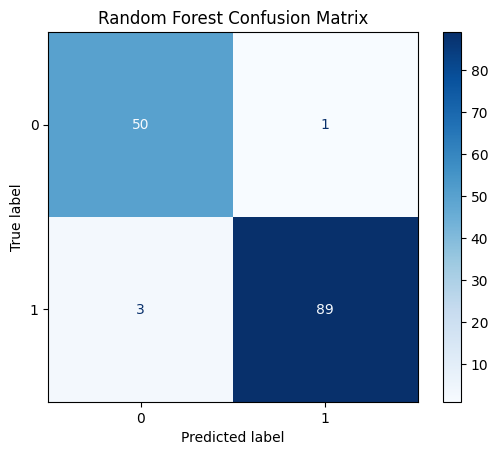

In [95]:
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", report)
print(rf_accuracy)

def plot_confusion_matrix(cm, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

plot_confusion_matrix(conf_matrix, "Random Forest Confusion Matrix")

In [96]:
best_n_estimators = grid_search_rf.best_params_['n_estimators']
best_max_depth = grid_search_rf.best_params_['max_depth']
best_max_features = grid_search_rf.best_params_['max_features']

print("Best n_estimators:", best_n_estimators)
print("Best max_depth:", best_max_depth)
print("Max features:", best_max_features)

Best n_estimators: 75
Best max_depth: 6
Max features: 1


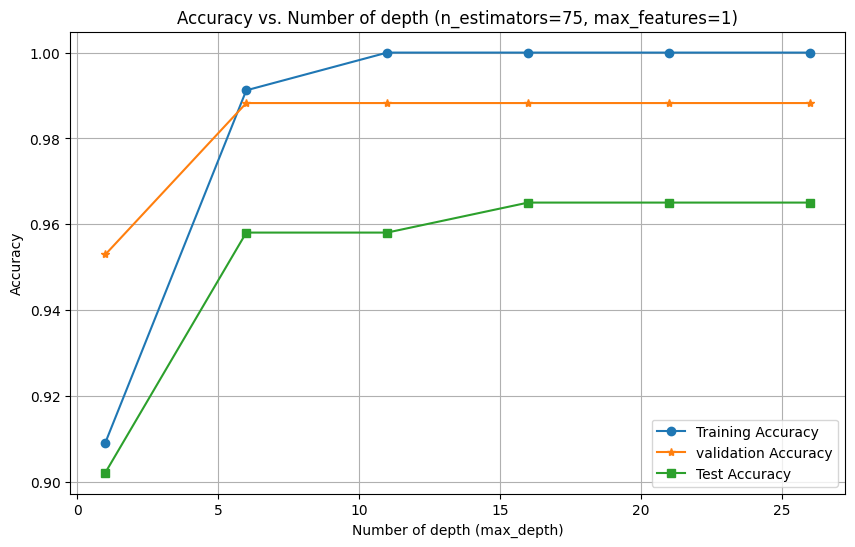

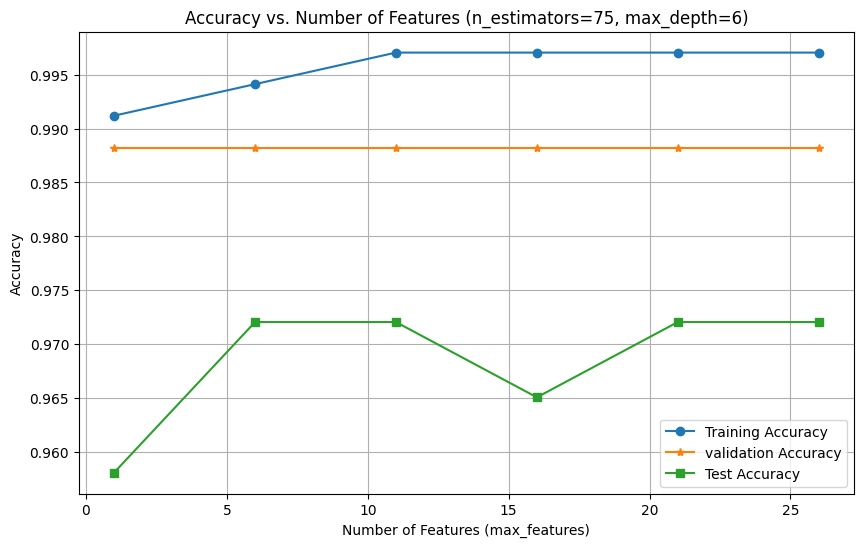

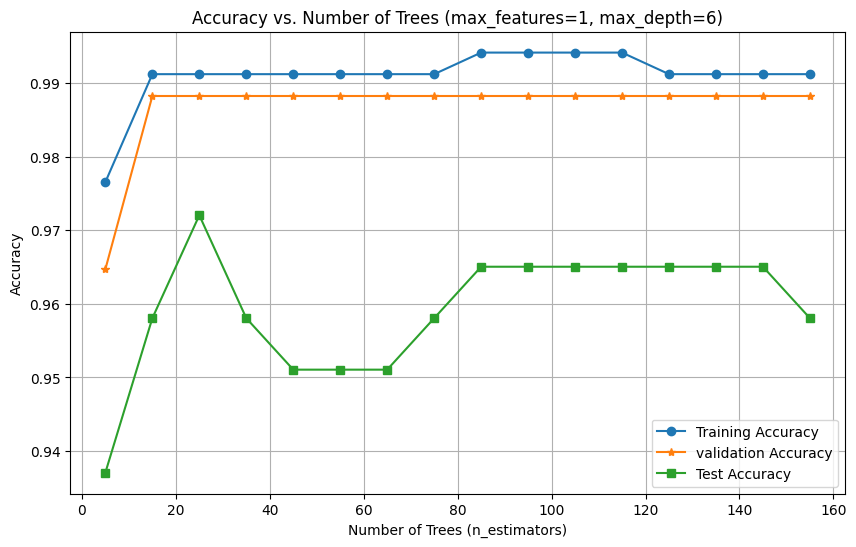

In [107]:
''' Plot 1 : Varying max_depth with fixed n_estimators and max_features'''
depth_range = range(1, 27, 5)
depth_train_accuracies = []
depth_rf_val_accuracies_one = []
depth_test_accuracies = []

for max_depth in depth_range:
    model = RandomForestClassifier(
        n_estimators=best_n_estimators,
        max_depth=max_depth,
        max_features=best_max_features,
        random_state=42
    )
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)
    depth_train_accuracies.append(accuracy_score(y_train, train_pred))
    depth_rf_val_accuracies_one.append(accuracy_score(y_val, val_pred))
    depth_test_accuracies.append(accuracy_score(y_test, test_pred))


plt.figure(figsize=(10, 6))
plt.plot(depth_range, depth_train_accuracies, label="Training Accuracy", marker='o')
plt.plot(depth_range, depth_rf_val_accuracies_one, label="validation Accuracy", marker='*')
plt.plot(depth_range, depth_test_accuracies, label="Test Accuracy", marker='s')
plt.xlabel("Number of depth (max_depth)")
plt.ylabel("Accuracy")
plt.title(f"Accuracy vs. Number of depth (n_estimators={best_n_estimators}, max_features={best_max_features})")
plt.legend()
plt.grid(True)
plt.show()
''' Plot 2: Varying max_features with fixed n_estimators and max_depth '''
feature_range = range(1, 27, 5)
feature_train_accuracies = []
feature_val_accuracies = []
feature_test_accuracies = []

for max_features in feature_range:
    model = RandomForestClassifier(
        n_estimators=best_n_estimators,
        max_depth=best_max_depth,
        max_features=max_features,
        random_state=42
    )
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)
    feature_train_accuracies.append(accuracy_score(y_train, train_pred))
    feature_val_accuracies.append(accuracy_score(y_val, val_pred))
    feature_test_accuracies.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(feature_range, feature_train_accuracies, label="Training Accuracy", marker='o')
plt.plot(feature_range, feature_val_accuracies, label="validation Accuracy", marker='*')
plt.plot(feature_range, feature_test_accuracies, label="Test Accuracy", marker='s')
plt.xlabel("Number of Features (max_features)")
plt.ylabel("Accuracy")
plt.title(f"Accuracy vs. Number of Features (n_estimators={best_n_estimators}, max_depth={best_max_depth})")
plt.legend()
plt.grid(True)
plt.show()

''' Plot 3: Varying n_estimators with fixed max_features and max_depth '''
tree_range = range(5, 156, 10)
tree_train_accuracies = []
tree_rf_val_accuracies_two = []
tree_test_accuracies = []

for n_estimators in tree_range:
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=best_max_depth,
        max_features=best_max_features,
        random_state=42
    )
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)
    tree_train_accuracies.append(accuracy_score(y_train, train_pred))
    tree_rf_val_accuracies_two.append(accuracy_score(y_val, val_pred))
    tree_test_accuracies.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(tree_range, tree_train_accuracies, label="Training Accuracy", marker='o')
plt.plot(tree_range, tree_rf_val_accuracies_two, label="validation Accuracy", marker='*')
plt.plot(tree_range, tree_test_accuracies, label="Test Accuracy", marker='s')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title(f"Accuracy vs. Number of Trees (max_features={best_max_features}, max_depth={best_max_depth})")
plt.legend()
plt.grid(True)
plt.show()

**B**

In [98]:
class AdaBoostClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=50, learning_rate=1.0, max_depth=1, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.models = []
        self.model_weights = []

    def fit(self, X, y):
        n_samples, _ = X.shape
        self.random_state_ = check_random_state(self.random_state)
        sample_weights = np.full(n_samples, 1 / n_samples)

        self.models.clear()
        self.model_weights.clear()

        for i in range(self.n_estimators):
            model = DecisionTreeClassifier(max_depth=self.max_depth, criterion='gini', random_state=self.random_state_)
            model.fit(X, y, sample_weight=sample_weights)

            y_pred = model.predict(X)
            incorrect = (y_pred != y)
            error = np.dot(sample_weights, incorrect) / np.sum(sample_weights)

            if error > 0.5:
                break

            model_weight = self.learning_rate * np.log((1 - error) / (error + 1e-10))
            self.models.append(model)
            self.model_weights.append(model_weight)

            sample_weights *= np.exp(model_weight * incorrect)
            sample_weights /= np.sum(sample_weights)

        return self

    def predict(self, X):
        final_prediction = sum(model_weight * model.predict(X)
                               for model, model_weight in zip(self.models, self.model_weights))
        return np.sign(final_prediction)

    def predict_proba(self, X):
        final_scores = sum(model_weight * model.predict_proba(X)
                           for model, model_weight in zip(self.models, self.model_weights))
        return final_scores / np.sum(self.model_weights)

In [99]:
ab = AdaBoostClassifier(random_state=10)
grid_search_ab = GridSearchCV(estimator=ab, param_grid=ab_params, cv=5, scoring='accuracy')

grid_search_ab.fit(X_train, y_train)

print("Best parameters found: ", grid_search_ab.best_params_)
print("Best cross-validation accuracy: ", grid_search_ab.best_score_)

best_ab_model = grid_search_ab.best_estimator_
y_val_pred = best_ab_model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation accuracy Adaboost: ", val_accuracy)

Streaming output truncated to the last 5000 lines.
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 199, in _get_response_values
    classes = estimator.classes_
AttributeError: 'AdaBoostClassifier' object has no attribute 'classes_'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_call

Best parameters found:  {'max_depth': 1, 'n_estimators': 5}
Best cross-validation accuracy:  nan
Validation accuracy Adaboost:  0.8823529411764706


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 199, in _get_response_values
    classes = estimator.classe

In [100]:
print("Best parameters found: ", grid_search_ab.best_params_)
best_ab_model = grid_search_ab.best_estimator_
y_test_pred = best_ab_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy: ", test_accuracy)

Best parameters found:  {'max_depth': 1, 'n_estimators': 5}
Test accuracy:  0.8671328671328671


In [101]:
y_test_pred = best_ab_model.predict(X_test)
ab_accuracy = accuracy_score(y_test, y_test_pred)
ab_precision = precision_score(y_test, y_test_pred)
ab_recall = recall_score(y_test, y_test_pred)
ab_f1 = f1_score(y_test, y_test_pred)
ab_conf_matrix = confusion_matrix(y_test, y_test_pred)

print("AdaBoost Results:")
print(f"Accuracy: {ab_accuracy}")
print(f"Precision: {ab_precision}")
print(f"Recall: {ab_recall}")
print(f"F1 Score: {ab_f1}")
print(f"Confusion Matrix: \n{ab_conf_matrix}")

AdaBoost Results:
Accuracy: 0.8671328671328671
Precision: 0.8288288288288288
Recall: 1.0
F1 Score: 0.9064039408866995
Confusion Matrix: 
[[32 19]
 [ 0 92]]


Accuracy: 0.8671328671328671
Confusion Matrix:
 [[32 19]
 [ 0 92]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.63      0.77        51
           1       0.83      1.00      0.91        92

    accuracy                           0.87       143
   macro avg       0.91      0.81      0.84       143
weighted avg       0.89      0.87      0.86       143

0.972027972027972


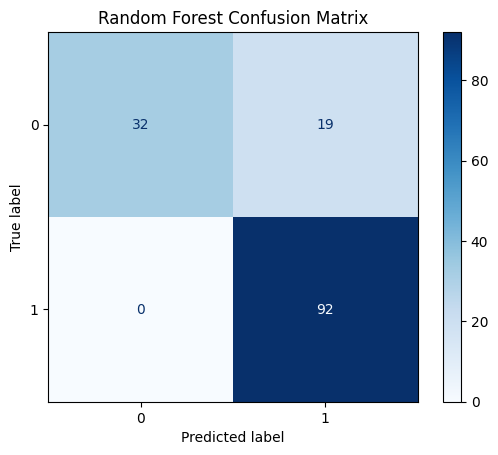

In [102]:
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy}")

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_test, y_test_pred)
print("Classification Report:\n", report)
print(rf_accuracy)

def plot_confusion_matrix(cm, title):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

plot_confusion_matrix(conf_matrix, "Random Forest Confusion Matrix")

In [114]:
best_n_estimators = grid_search_ab.best_params_['n_estimators']
best_max_depth = grid_search_ab.best_params_['max_depth']



print("Best n_estimators:", best_n_estimators)
print("Best max_depth:", best_max_depth)

Best n_estimators: 5
Best max_depth: 1


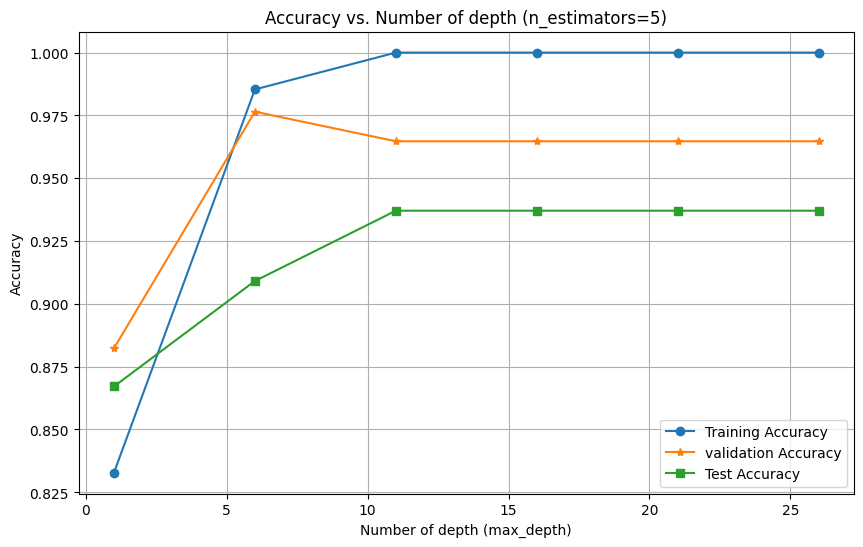

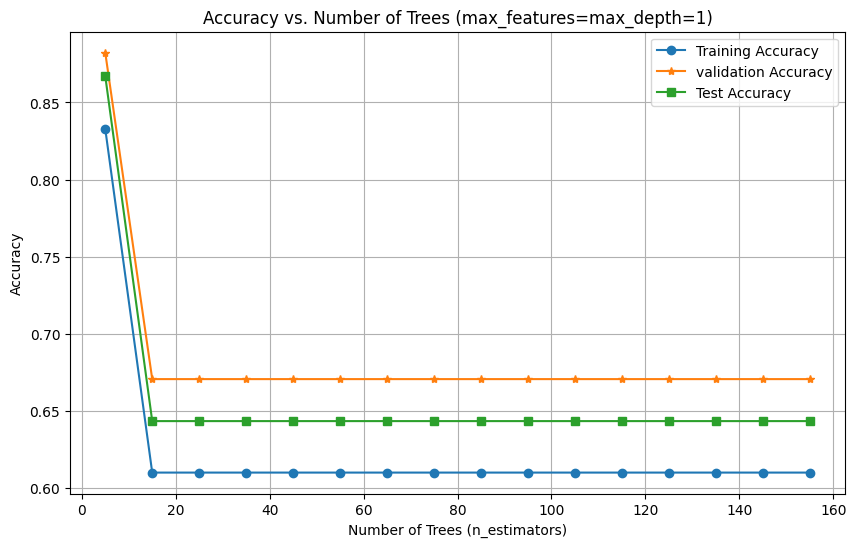

In [115]:
'''Plot1 : Varying max_depth with fixed n_estimators'''
depth_range = range(1, 27, 5)
depth_train_accuracies = []
depth_ab_val_accuracies_one = []
depth_test_accuracies = []

for max_depth in depth_range:
    model = AdaBoostClassifier(
        n_estimators=best_n_estimators,
        max_depth=max_depth,
        random_state=42
    )
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)
    depth_train_accuracies.append(accuracy_score(y_train, train_pred))
    depth_ab_val_accuracies_one.append(accuracy_score(y_val, val_pred))
    depth_test_accuracies.append(accuracy_score(y_test, test_pred))


plt.figure(figsize=(10, 6))
plt.plot(depth_range, depth_train_accuracies, label="Training Accuracy", marker='o')
plt.plot(depth_range, depth_ab_val_accuracies_one, label="validation Accuracy", marker='*')
plt.plot(depth_range, depth_test_accuracies, label="Test Accuracy", marker='s')
plt.xlabel("Number of depth (max_depth)")
plt.ylabel("Accuracy")
plt.title(f"Accuracy vs. Number of depth (n_estimators={best_n_estimators})")
plt.legend()
plt.grid(True)
plt.show()
'''Plot 2: Varying n_estimators with fixed max_depth'''
tree_range = range(5, 156, 10)
tree_train_accuracies = []
tree_ab_val_accuracies_two = []
tree_test_accuracies = []

for n_estimators in tree_range:
    model = AdaBoostClassifier(
        n_estimators=n_estimators,
        max_depth=best_max_depth,
        random_state=42
    )
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)
    tree_train_accuracies.append(accuracy_score(y_train, train_pred))
    tree_ab_val_accuracies_two.append(accuracy_score(y_val, val_pred))
    tree_test_accuracies.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(tree_range, tree_train_accuracies, label="Training Accuracy", marker='o')
plt.plot(tree_range, tree_ab_val_accuracies_two, label="validation Accuracy", marker='*')
plt.plot(tree_range, tree_test_accuracies, label="Test Accuracy", marker='s')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title(f"Accuracy vs. Number of Trees (max_features=max_depth={best_max_depth})")
plt.legend()
plt.grid(True)
plt.show()

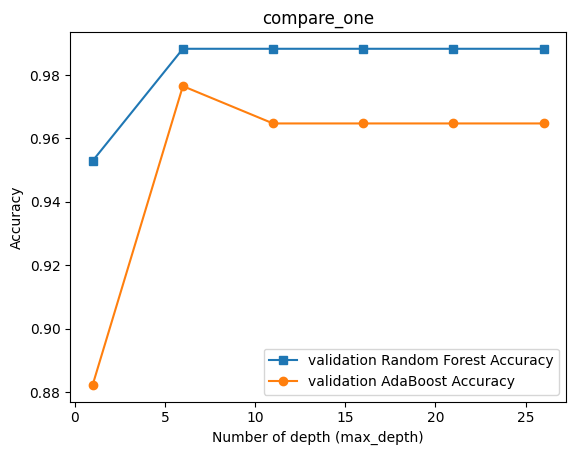

In [110]:
plt.plot(depth_range, depth_rf_val_accuracies_one, label="validation Random Forest Accuracy", marker='s')
plt.plot(depth_range, depth_ab_val_accuracies_one, label="validation AdaBoost Accuracy", marker='o')
plt.xlabel("Number of depth (max_depth)")
plt.ylabel("Accuracy")
plt.title("compare_one")

plt.legend()

plt.show()

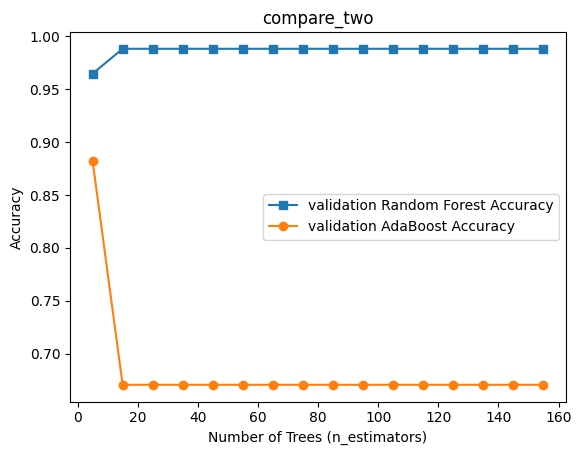

In [111]:
plt.plot(tree_range, tree_rf_val_accuracies_two, label="validation Random Forest Accuracy", marker='s')
plt.plot(tree_range, tree_ab_val_accuracies_two, label="validation AdaBoost Accuracy", marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("compare_two")

plt.legend()

plt.show()